# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 20 minutes]
---

### Normal Distributions

Let's consider check totals at a TexMex restaurant. We know that the population distribution of check totals is normally distributed with a mean of $\mu$ = \\$20 and standard deviation of $\sigma$ = \\$3. 

### 1.1) Compute the z-score for a \\$26 check. 

In [3]:
# Code here 
mu = 20
std = 3
z = (26-mu)/3

print(z)

2.0


### 1.2) Approximately what percentage of all checks are less than \\$26? Explain how you came to your answer.

You can answer this using the empirical rule or this [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

- 95% of data is contained between -2 and 2 standard deviations
- 5% is therefore remaining
- since we are only looking at what's left of 2 standard deviations, we want to add 95% + (5%/2) to account for one tail

- **therefore we should expect roughly 97.5% of the data to be less than $26**

In [6]:
#checking the above logic with code
stats.norm.cdf(z)

0.9772498680518208

### Confidence Intervals

One month, a waiter gets 500 checks with a mean amount of \\$19 and a standard deviation of \\$3.

### 1.3) Use this sample to calculate a 95% confidence interval for the mean of this waiter's check amounts. Interpret the result. 

In [53]:
n = 500
x_bar = 19
s = 3

stats.t.interval(alpha = .05,
                df = n-1,
                loc = x_bar,
                scale = s)

(18.811785022860967, 19.188214977139033)

"Based on the data, we are 95% confident that the mean check amount falls between 18.81 and 19.18 dollars"

---
## Part 2: Statistical Testing [Suggested time: 20 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

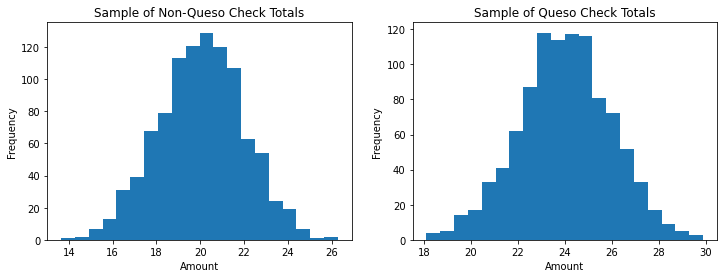

In [11]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

Ho: u1 = u2 -> "The average check value is the same between groups"

Ha: u1 != u2 -> "The average check value is not the same between groups"

### 2.2) What does it mean to make a `Type I` error or a `Type II` error in this specific context?

Type I Error: 
- reject null hypothesis that the average check values are the same... when in fact they are the same

Type II Error: 
- fail to reject null hypothesis that the average check values are the same... when in fact they are not the same

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [58]:
def two_pop_mean(pop1, pop2):
    n1 = len(pop1)
    n2 = len(pop2)
    s1 = np.std(pop1)
    s2 = np.std(pop2)
    x1 = np.mean(pop1)
    x2 = np.mean(pop2)

    sp = np.sqrt(((n1-1)*(s1**2) + (n2-1)*(s2**2)) / (n1 + n2 - 2))
    t_star = (x1 - x2) / (sp*np.sqrt((1/n1+1/n2)))
    p_val = stats.t.sf(t_star, n1+n2-2)
    t_crit = stats.t.ppf(.975, n1+n2-2)
    
    print("t_crit = {}".format(t_crit))
    print("t_star = {}".format(t_star))
    print("p_val = {}".format(p_val))
    
    return t_crit, t_star, p_val*2

In [59]:
two_pop_mean(queso, no_queso)

t_crit = 1.9611520148367056
t_star = 45.19117872755062
p_val = 3.911510233838519e-308


(1.9611520148367056, 45.19117872755062, 7.823020467677038e-308)

- As seen from the function output, our P_val is extremely small (smaller than alpha = .05) and as such **we reject the null hypothesis that the average check values are the same across groups**

- Additionally, we can compare the t_star with the t_crit values. Since t_star (45.19) is greater than t_crit (1.9611), **we reject the null hypothesis that the average check values are the same across groups**

In [60]:
#verifying above function with built in function
t_stat, p_val = stats.ttest_ind(queso, no_queso)

print(t_stat)
print(p_val*2)

45.16857748646329
2.59341934185022e-307


---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

A medical test is designed to diagnose a certain disease. The test has a false positive rate of 10%, meaning that 10% of people without the disease will get a positive test result. The test has a false negative rate of 2%, meaning that 2% of people with the disease will get a negative result. Only 1% of the population has this disease.

### 3.1) What is the probability of receiving a positive test result? Show how you arrive at your answer.

Assume that the person being tested is randomly selected from the broader population. You can show your work using text, code, or both.

In [36]:
# Code to calculate the probability here
sick = .01
healthy = .99
negative_sick = .02
positive_sick = .98
positive_healthy = .1

positive = sick*positive_sick + healthy*positive_healthy

positive

0.10880000000000001

The probability of receiving a positive test result is roughly 10.8%

### 3.2) If a patient receives a positive test result, what is the probability that they actually have the disease? Show how you arrive at your answer.

Hint: Use your answer to the previous question to answer this one. You can show your work using text, code, or both.

p(sick_positive) = p(positive_sick) * p(sick) / p(positive)

In [37]:
# Code to calculate the probability here
positive_sick = .98
sick = .01
positive = positive

sick_positive = positive_sick*sick/positive

sick_positive

0.09007352941176469

Roughly 9% of people that test positive are actually sick. This may seem very low, but it is explained by the fact that only 1% of people actually have the disease

---
## Part 4: Linear Regression [Suggested Time: 20 min]
---

In this section, you'll be using the Advertising data to run regression models. In this dataset, each row represents a different product, and we have a sample of 200 products from a larger population of products. We have three features - `TV`, `radio`, and `newspaper` - that describe how many thousands of advertising dollars were spent promoting the product. The target, `sales`, describes how many millions of dollars in sales the product had.

The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [38]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

### Simple Linear Regression

### 4.1) Use StatsModels' `ols`-function to run a linear regression model using `TV` to predict `sales`. 

**Required output:** the summary of this regression model.

In [44]:
# Code here 
formula = "sales~TV"

model = ols(formula = formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        11:01:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.2) Can we infer that products with higher TV advertising spend tend to have greater sales? Explain how you determined this from the model output. 

This question is asking you to use your findings from the sample in your dataset to make an inference about the relationship between TV advertising spend and sales in the broader population.

- We **can** infer that products with higher TV advertising spend tend to have greater sales
- In the model.summary() output, the **P-Value** for TV coefficient is essentially 0
- In fact, since this is a Single Variable Linear Regression, the TV P-Value = p(F-stat) = 1.47e^-42. Very small
- Because of this, we can **reject the null hypothesis that "TV coefficient = 0"**. In other words, TV spend has an impact on Sales

### Multiple Linear Regression

### 4.3) Compute a correlation matrix for `X`. Given these correlation coefficients, would there be any issue if you included all of these features in one regression model? 

In [45]:
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


- The correlation matrix shows that none of the independent variables (TV, radio, newspaper) have particularly high correlations with eachother.
- the highest correlation is of value .35, which isn't high enough to consitute an issue of multicollinearity

### 4.4) Use StatsModels' `ols`-function to run a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the summary of this regression model.

In [46]:
formula = "sales~TV+radio+newspaper"
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        11:07:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.5) Does this model do a better job of explaining sales than the previous model using only the `TV` feature? Explain how you determined this based on the model output. 

- Yes, the multiple regression model predicts sales better than the single regression model
- I arrived at this conclusion by comparing the R^2 values for each

- Multiple Regression R^2 == .897
- Single Regression R^2 == .612

- Because multiple regression R^2 is bigger than single regression R^2, we can say that the multiple regression model fits the data better